In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/grappeefruitt/schulich_data_science/main/messy_data.csv")

In [5]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


In [6]:
#always start with info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       105 non-null    int64  
 1   Income    94 non-null     float64
 2   Gender    105 non-null    object 
 3   Product   100 non-null    object 
 4   Quantity  105 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.2+ KB


In [7]:
df.describe(include='all')

,Age,Income,Gender,Product,Quantity
count,105.000000,94.000000,105,100,105.00000
unique,NaN,NaN,2,4,NaN
top,NaN,NaN,Female,D,NaN
freq,NaN,NaN,58,28,NaN
mean,42.076190,52867.862808,NaN,NaN,3.20000
std,15.940813,29896.579420,NaN,NaN,1.44382
min,18.000000,20901.331720,NaN,NaN,1.00000
25%,31.000000,37814.315255,NaN,NaN,2.00000
50%,41.000000,48760.369705,NaN,NaN,3.00000
75%,55.000000,61644.277868,NaN,NaN,5.00000


In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [24]:
Reload Window

SyntaxError: invalid syntax (2269389869.py, line 1)

In [12]:
import seaborn as sns
#use seaborn for visualization

In [ ]:
sns.histplot(df['Income'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

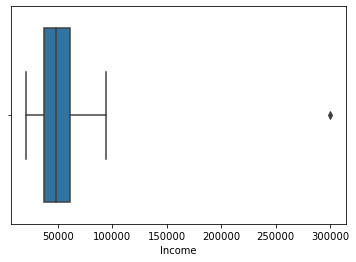

In [14]:
sns.boxplot(df['Income'])

In [18]:
#filter data set and identify the outtlier so we can drop the outlier
df['Income'] > 25000

0       True
1       True
2       True
3       True
4       True
       ...  
100     True
101     True
102     True
103    False
104     True
Name: Income, Length: 105, dtype: bool

In [20]:
df[df['Income'] == 30000]
# can use>25000 or we know max is 30000 can use ==30000

,Age,Income,Gender,Product,Quantity


In [21]:
#drop outlier
df.drop(99, axis=0, inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Income'>

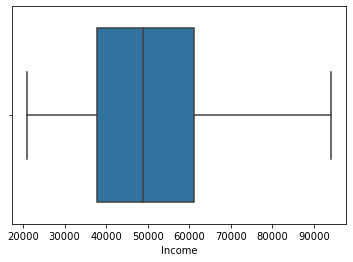

In [26]:
sns.boxplot(df['Income'])

In [25]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'

<AxesSubplot:xlabel='Gender', ylabel='Income'>

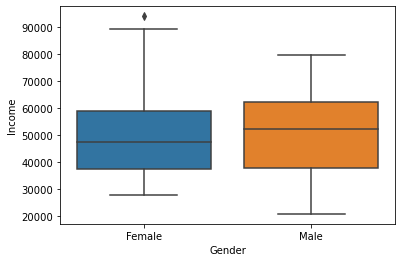

In [29]:
sns.boxplot(data = df, x='Gender', y= 'Income')

In [30]:
df

,Age,Income,Gender,Product,Quantity
0,56,59544.57663,Female,D,3
1,46,36399.18997,Female,NaN,1
2,32,57140.63881,Female,D,2
3,60,69554.91903,Male,C,5
4,25,53173.80518,Female,D,2
...,...,...,...,...,...
100,61,37341.55459,Male,D,5
101,55,35516.63492,Female,A,3
102,31,53254.05089,Male,B,2
103,21,NaN,Male,B,2


<AxesSubplot:xlabel='Income', ylabel='Age'>

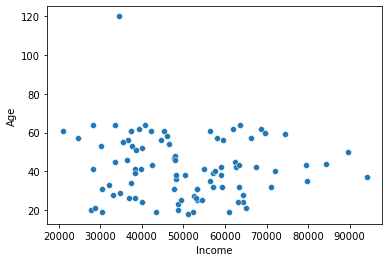

In [34]:
sns.scatterplot(data = df, x = 'Income', y = 'Age')

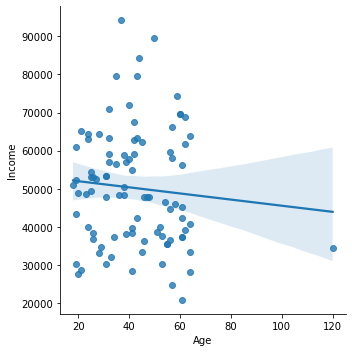

In [35]:
sns.lmplot(data = df, x = 'Age', y= 'Income',fit_reg=True)

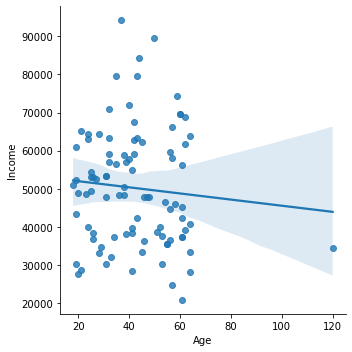

In [36]:
sns.lmplot(data = df, x = 'Age', y= 'Income',fit_reg=True, ci=99)

In [37]:
df.drop(df[df['Age']==120].index, axis=0, inplace=True)

In [38]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       98 non-null     int64  
 1   Income    88 non-null     float64
 2   Gender    98 non-null     object 
 3   Product   93 non-null     object 
 4   Quantity  98 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ KB


In [41]:
df['Product'] = df['Product'].fillna('Other')

In [42]:
df.groupby('Gender')['Income'].mean()

Gender
Female    50205.793962
Male      50795.175595
Name: Income, dtype: float64

In [43]:
df.groupby('Product')['Income'].mean()

Product
A        52599.570360
B        48693.364717
C        50742.171429
D        50377.772819
Other    47685.057048
Name: Income, dtype: float64

In [44]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [ ]:
sns.bo